In [3]:
import pandas as pd

df = pd.read_csv(r"c:\Users\vishwas.balkundi\Downloads\cars.csv",encoding="utf-8")

In [4]:
df

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B
...,...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,zeta,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,M
56240,lancia,zeta,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,M
56241,lancia,zeta,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,M
56242,lancia,zeta,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,M


In [5]:
def car_make(make):
    if make in ['mazda', 'mg', 'rover','alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin','jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault','dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'citroen', 'skoda', 'mini', 'smart' ]:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan','asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon', 'proton', 'jac']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'chrysler', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche','bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'
    
df['make_segment'] = df['make'].apply(car_make)

In [6]:
df['fuel_type'].value_counts()

fuel_type
petrol        36405
diesel        19792
electrocar       47
Name: count, dtype: int64

In [7]:
df.drop(columns = ['model','segment'], inplace=True)

In [8]:
df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
make_segment              7
dtype: int64

In [9]:
df['make_segment'].value_counts()

make_segment
Mainstream European         20328
Luxury European             14404
Asian                       11246
Other                        4381
American                     4145
Russian/Eastern European     1534
Specialty                     206
Name: count, dtype: int64

In [10]:
df['make_segment'].unique()

array(['Luxury European', 'Mainstream European',
       'Russian/Eastern European', 'American', 'Other', 'Specialty',
       'Asian'], dtype=object)

In [11]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


In [12]:
make_segment_counts = df['make_segment'].value_counts()
make_segment_counts.columns = ['make_segment', 'count']
print(make_segment_counts)

make_segment
Mainstream European         20328
Luxury European             14404
Asian                       11246
Other                        4381
American                     4145
Russian/Eastern European     1534
Specialty                     206
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Mainstream European'),
  Text(1, 0, 'Luxury European'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'American'),
  Text(5, 0, 'Russian/Eastern European'),
  Text(6, 0, 'Specialty')])

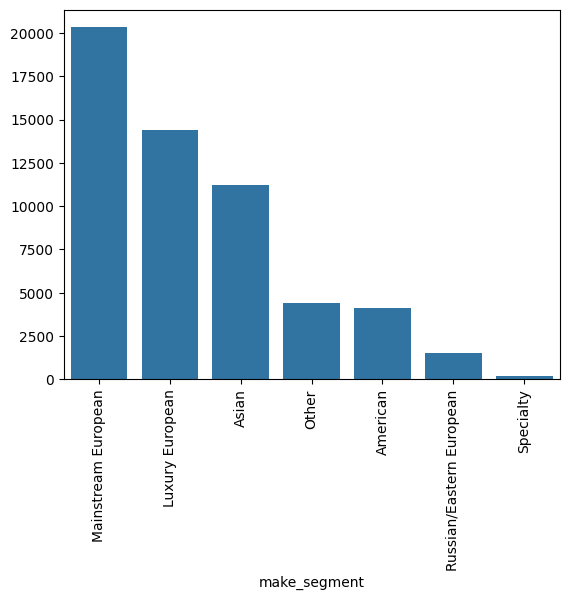

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
make_counts = df['make_segment'].value_counts()
sns.barplot(x=make_counts.index, y=make_counts.values)
plt.xticks(rotation=90)

In [14]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


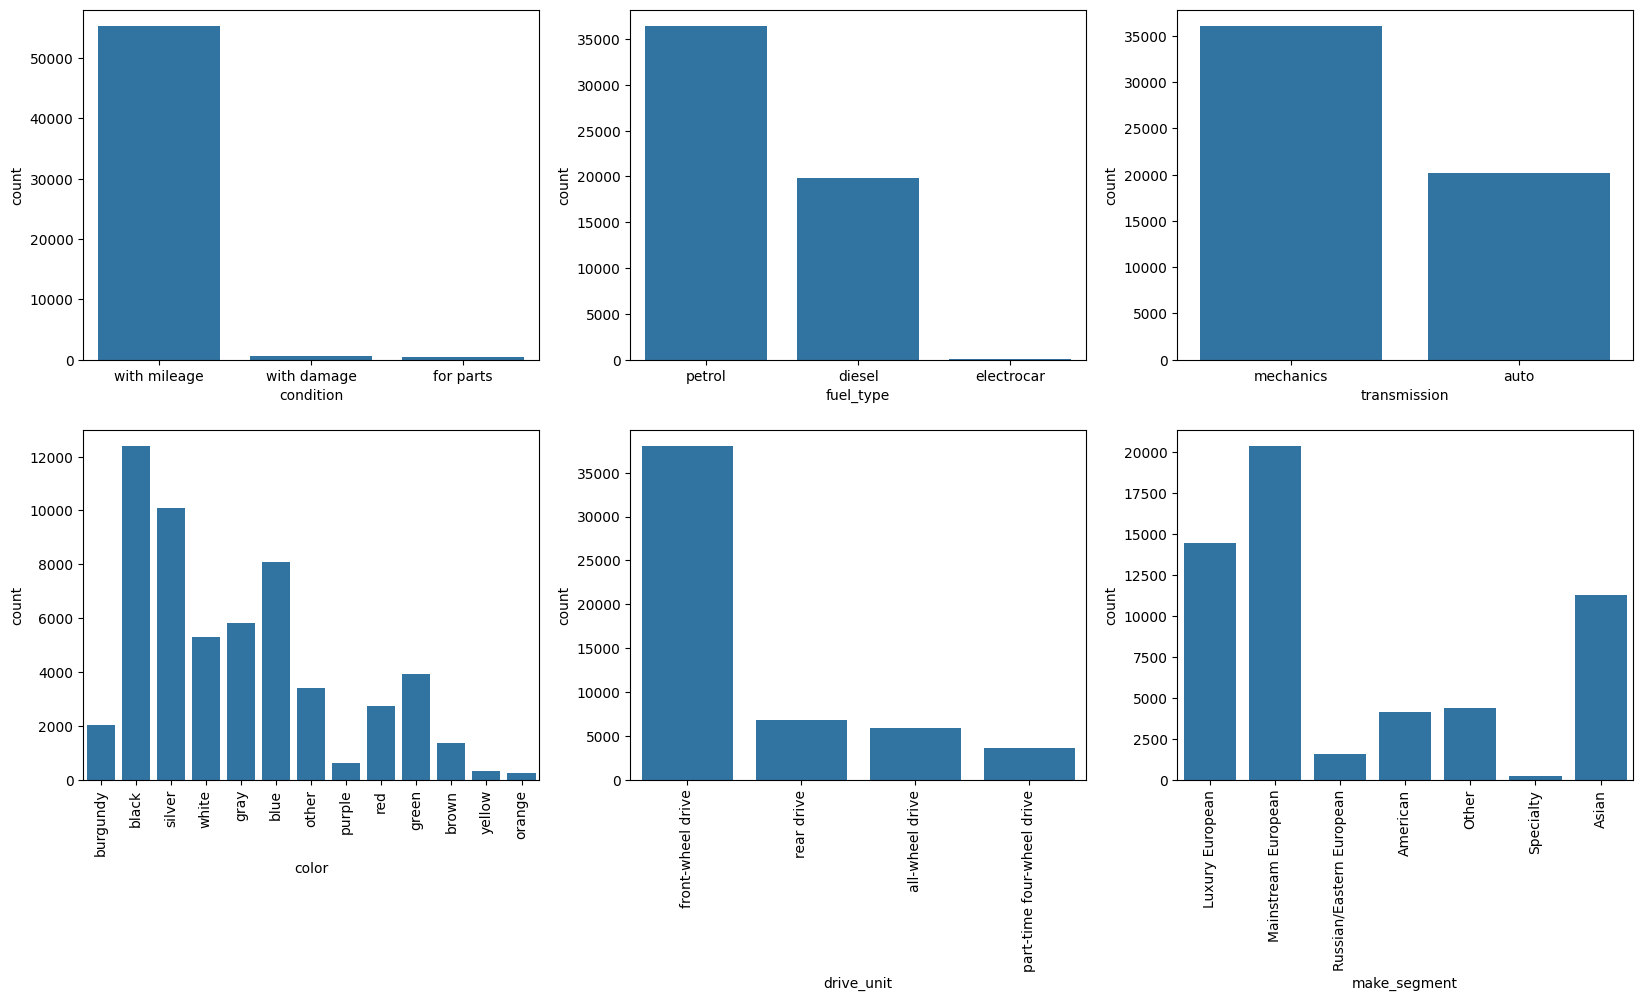

In [15]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

In [16]:
demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

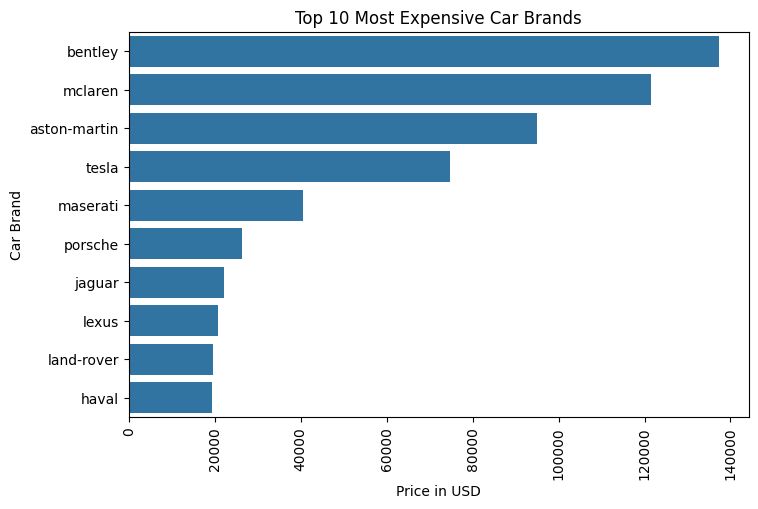

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf)
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

In [18]:
df.loc[df['make'].apply(lambda x:x.lower() == "bentley")]

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
16428,bentley,183848,2016,with mileage,22000.0,petrol,6000.0,silver,auto,all-wheel drive,Specialty
16429,bentley,170477,2016,with mileage,74100.0,petrol,6000.0,other,auto,all-wheel drive,Specialty
16430,bentley,195000,2016,with mileage,72000.0,petrol,6000.0,other,auto,all-wheel drive,Specialty
20785,bentley,26500,2006,with mileage,140000.0,petrol,6000.0,blue,auto,all-wheel drive,Specialty
20786,bentley,73000,2013,with mileage,73000.0,petrol,4000.0,white,auto,all-wheel drive,Specialty
20787,bentley,235235,2018,with mileage,29000.0,petrol,6000.0,white,auto,all-wheel drive,Specialty
20788,bentley,42000,2009,with mileage,98000.0,petrol,6000.0,white,auto,all-wheel drive,Specialty
35457,bentley,190141,2014,with mileage,36500.0,petrol,6750.0,purple,auto,rear drive,Specialty
35458,bentley,120000,2011,with mileage,178471.0,petrol,6800.0,gray,auto,all-wheel drive,Specialty


In [19]:
df.loc[df['year']>1980]

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European
...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Other
56240,lancia,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Other
56241,lancia,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Other
56242,lancia,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Other


<Axes: xlabel='volume(cm3)', ylabel='Count'>

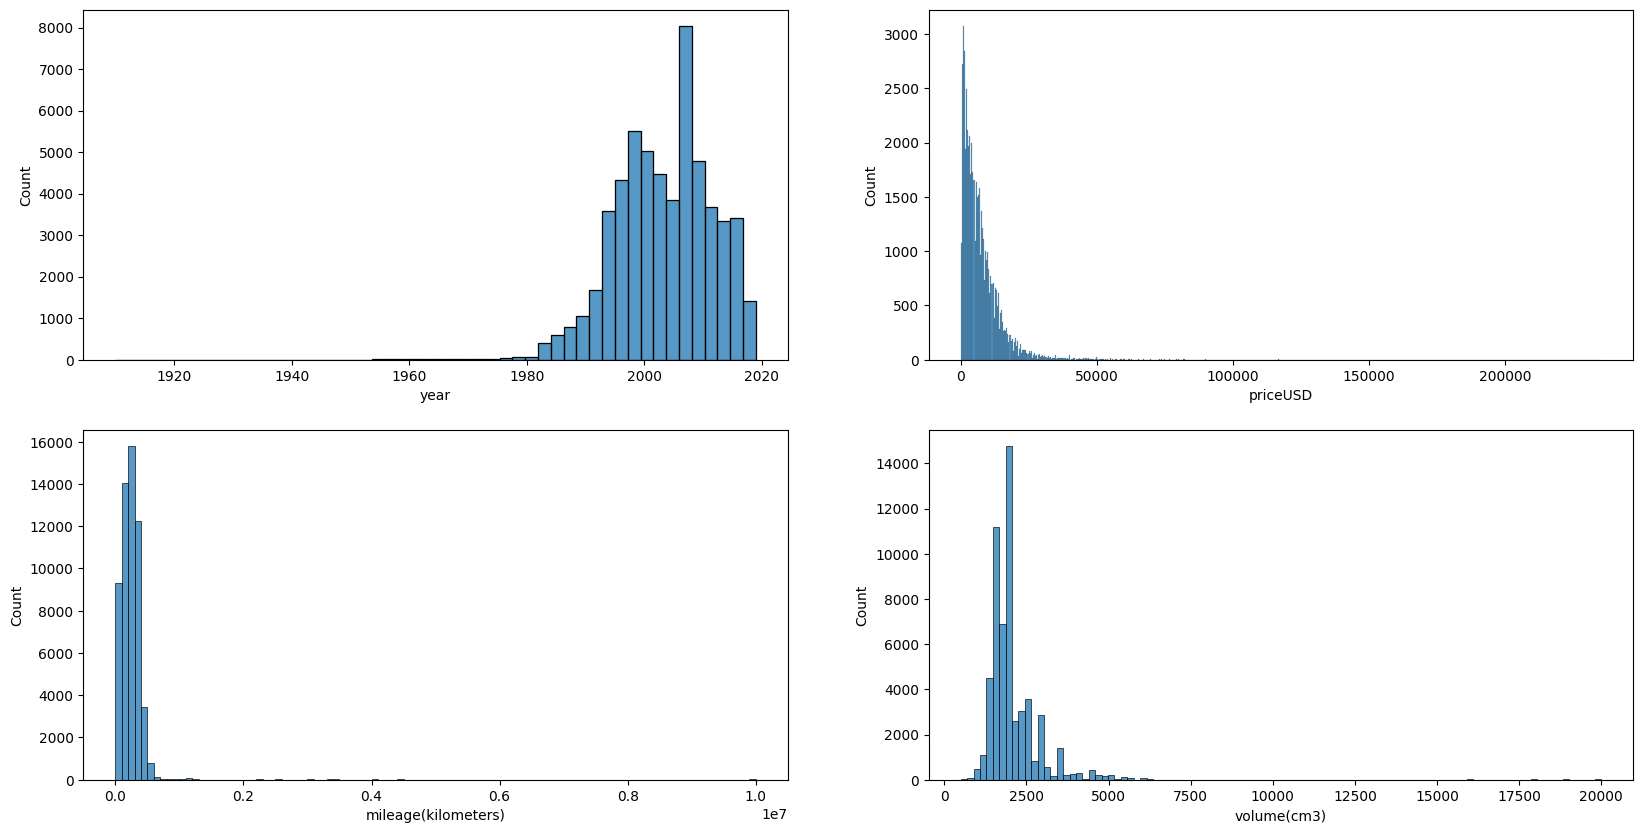

In [20]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)

In [21]:
df.shape

(56244, 11)

In [22]:
df= df[df['year']>1980]

In [23]:
df.shape

(55943, 11)

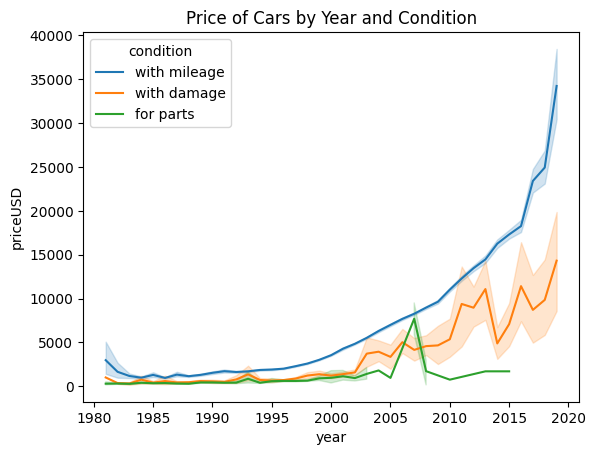

In [24]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'condition')
plt.title('Price of Cars by Year and Condition')
plt.show()

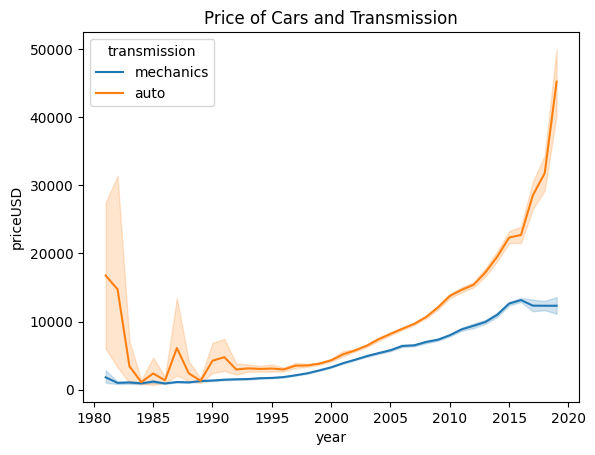

In [25]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

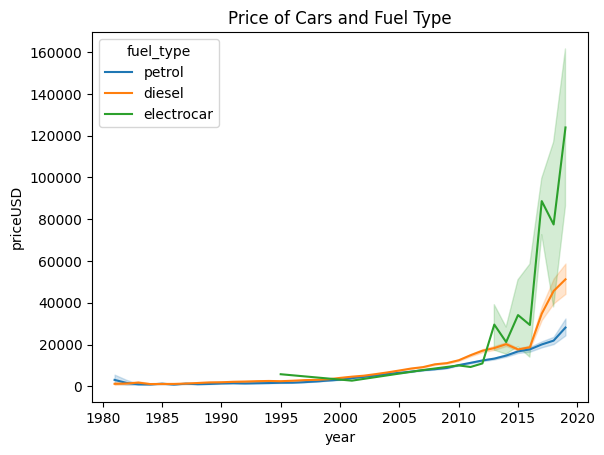

In [26]:
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

In [27]:
df

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European
...,...,...,...,...,...,...,...,...,...,...,...
56239,lancia,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Other
56240,lancia,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Other
56241,lancia,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Other
56242,lancia,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Other


In [28]:
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

In [29]:
df.dropna(inplace=True)

C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_1912\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [30]:
df.drop(columns=['make'], inplace=True)

C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_1912\1999857455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['make'], inplace=True)


In [31]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_1912\1214628569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_1912\1214628569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.transform(df[col])
C:\Users\vishwas.balkundi\AppData\Local\Temp\ipykernel_1912\1214628569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

<Axes: >

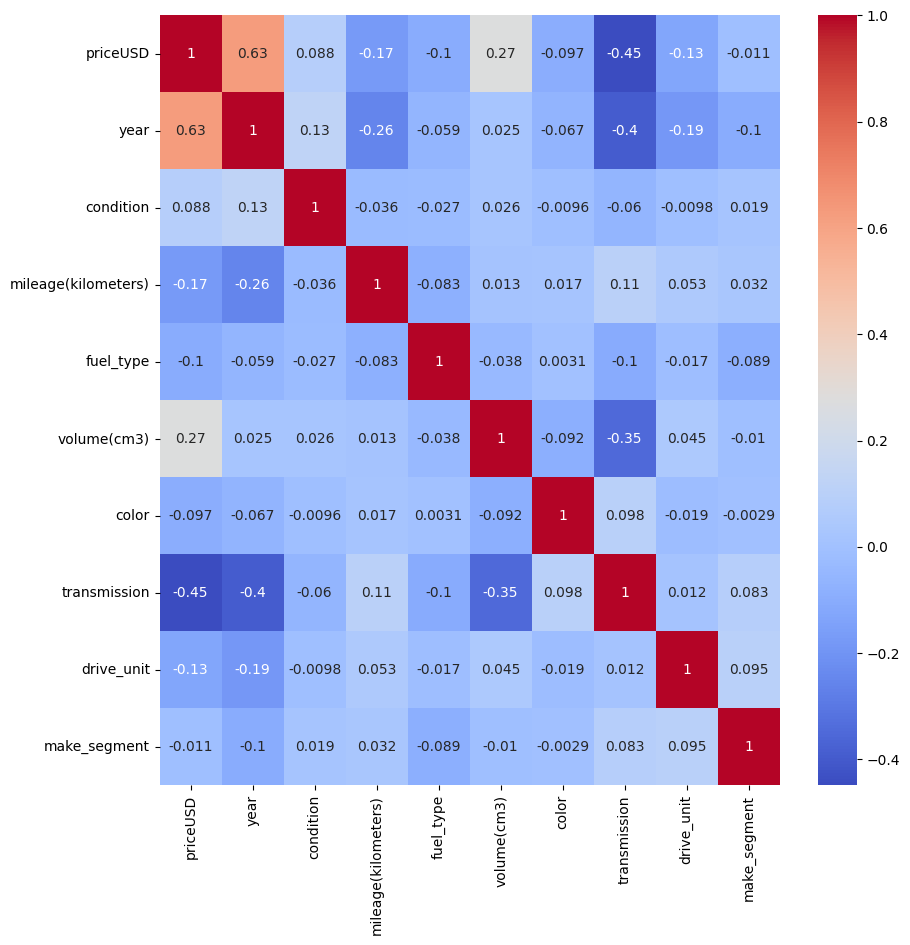

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [33]:
df.shape

(54024, 10)

In [34]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

# threshold = 3

In [35]:
np.abs(stats.zscore(df))

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,0.233095,0.575633,NaN,0.529094,0.745347,0.864117,0.466200,0.735434,0.26998,0.205572
1,0.259750,0.707270,NaN,0.854022,0.745347,1.186194,1.183418,0.735434,0.26998,0.205572
2,0.033454,0.707270,NaN,1.310469,0.745347,0.864117,1.207309,1.359742,0.26998,0.205572
3,0.624033,0.082551,NaN,0.267753,1.341657,1.025155,1.446382,0.735434,0.26998,0.205572
4,0.286405,0.575633,NaN,1.030543,1.341657,1.025155,0.227127,0.735434,0.26998,0.205572
...,...,...,...,...,...,...,...,...,...,...
56239,0.561838,0.477462,NaN,0.461163,0.745347,0.058926,0.490091,0.735434,0.26998,1.543393
56240,0.481874,0.609099,NaN,0.847982,1.341657,0.102113,0.944345,0.735434,0.26998,1.543393
56241,0.570723,0.872373,NaN,0.956291,1.341657,0.102113,0.466200,0.735434,0.26998,1.543393
56242,0.677343,0.872373,NaN,0.925346,0.745347,0.058926,0.944345,0.735434,0.26998,1.543393


In [36]:
df.shape

(51434, 10)

In [37]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor Object
dtr = DecisionTreeRegressor()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

In [42]:
X_train

,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
16469,2016,2,96000.0,1,1600.0,4,1,1,3
36999,1990,2,1111.0,1,2400.0,4,1,3,3
15587,1998,2,387.0,0,1700.0,11,1,1,3
39898,1989,2,222000.0,1,1800.0,11,1,1,3
664,2002,2,360000.0,1,2300.0,10,0,1,2
...,...,...,...,...,...,...,...,...,...
12409,2002,2,331000.0,0,2500.0,1,0,1,2
48976,2011,2,212000.0,1,1800.0,4,1,1,1
41652,1995,2,300000.0,1,1100.0,3,1,1,3
998,2001,2,300000.0,1,2450.0,1,1,2,5


In [39]:
dtr = DecisionTreeRegressor()

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
dtr.score(X_train, y_train)

0.9987943427078315

In [44]:
y_pred = dtr.predict(X_test)

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.8009766965419268
Mean Squared Error:  6369300.914813361
Mean Absolute Error:  1623.3623181361588
Root Mean Squared Error:  2523.7473952068503


In [56]:
df['priceUSD'].min()

100

In [53]:
min(1,2,3)

TypeError: 'int' object is not callable

In [28]:
from scipy import stats
z = np.abs(stats.zscore(df))
z

TypeError: unsupported operand type(s) for /: 'str' and 'int'